In [2]:
from data import C, M, num_sift_kp, lazy_df
print('num_sift_kp=' + str(num_sift_kp))
df = lazy_df()
print df.dtypes

num_sift_kp=30
name                      object
class                   category
sift_kp_descriptors       object
red_histogram             object
green_histogram           object
blue_histogram            object
hue_histogram             object
saturation_histogram      object
value_histogram           object
dtype: object


In [3]:
import numpy as np
sift_des = np.array(list(df['sift_kp_descriptors'])).reshape((C * M * num_sift_kp, 128))
print sift_des.shape

(6000, 128)


In [4]:
from scipy.spatial.distance import pdist, squareform
K_vectors = squareform(pdist(sift_des, 'euclidean'))  # pairwise Euclidean distances of vectors
print K_vectors.shape

(6000, 6000)


<matplotlib.colorbar.Colorbar instance at 0x113a19638>

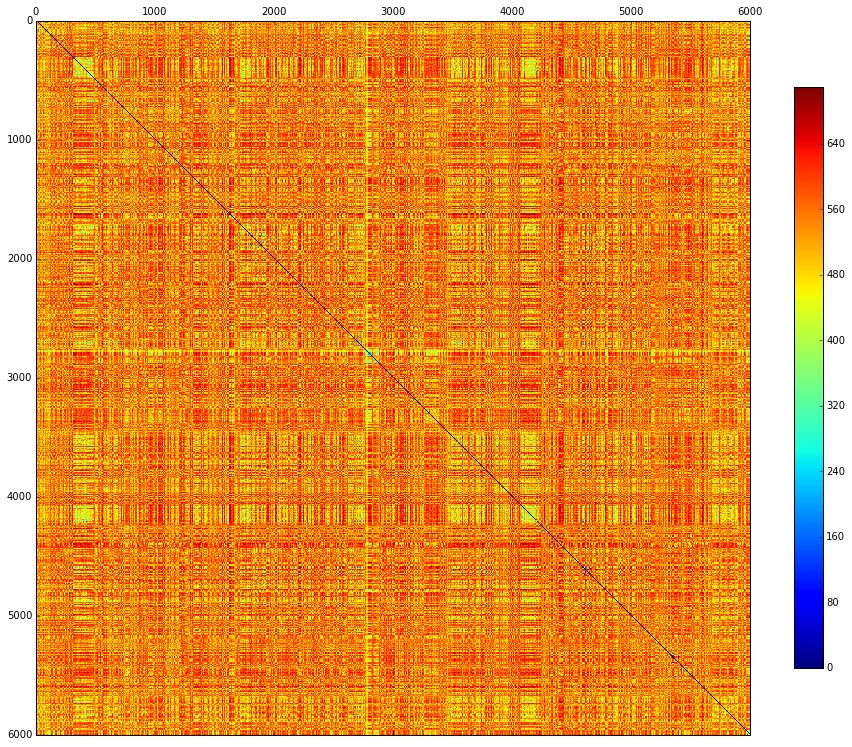

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(111)
heatmap = ax.matshow(K_vectors)
fig.colorbar(heatmap, shrink=0.8)

In [7]:
# the pairwise distance of classes is defined as the sum of inter/intra-class pairwise distance of vectors
K_classes = np.empty((C, C))
for i in range(0, C):
    for j in range(0, C):
        row_from = M * num_sift_kp * i
        row_to = M * num_sift_kp * (i + 1)
        col_from = M * num_sift_kp * j
        col_to = M * num_sift_kp * (j + 1)
        K_classes[i, j] = K_vectors[row_from:row_to, col_from:col_to].sum(axis=(0, 1))
print K_classes.shape

(50, 50)


<matplotlib.colorbar.Colorbar instance at 0x1137ec200>

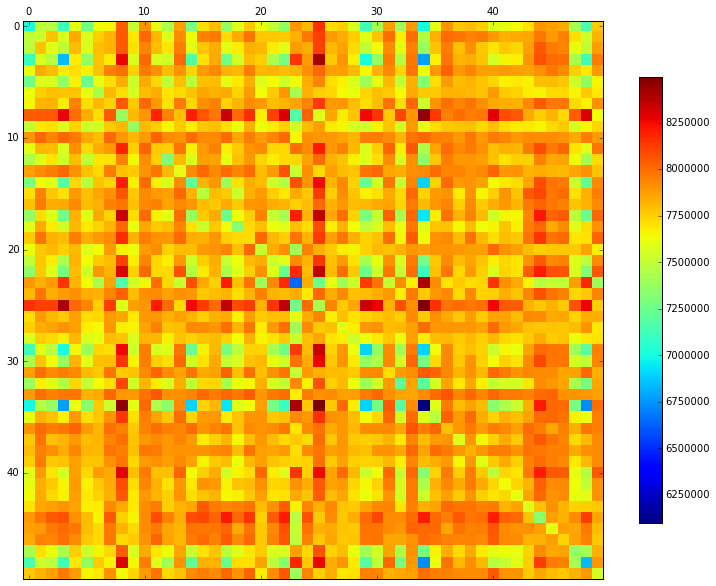

In [8]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
heatmap = ax.matshow(K_classes, aspect='auto')
fig.colorbar(heatmap, shrink=0.8)